Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Since the data of Target variable is continuous it's a regression problem.

# EDA

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Here we can analyse that country and region are object type data, happiness rank is integer type and all other left out data is float type data.

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there is no nul values present inside the dataset

In [16]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [24]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

# Univariate Analysis

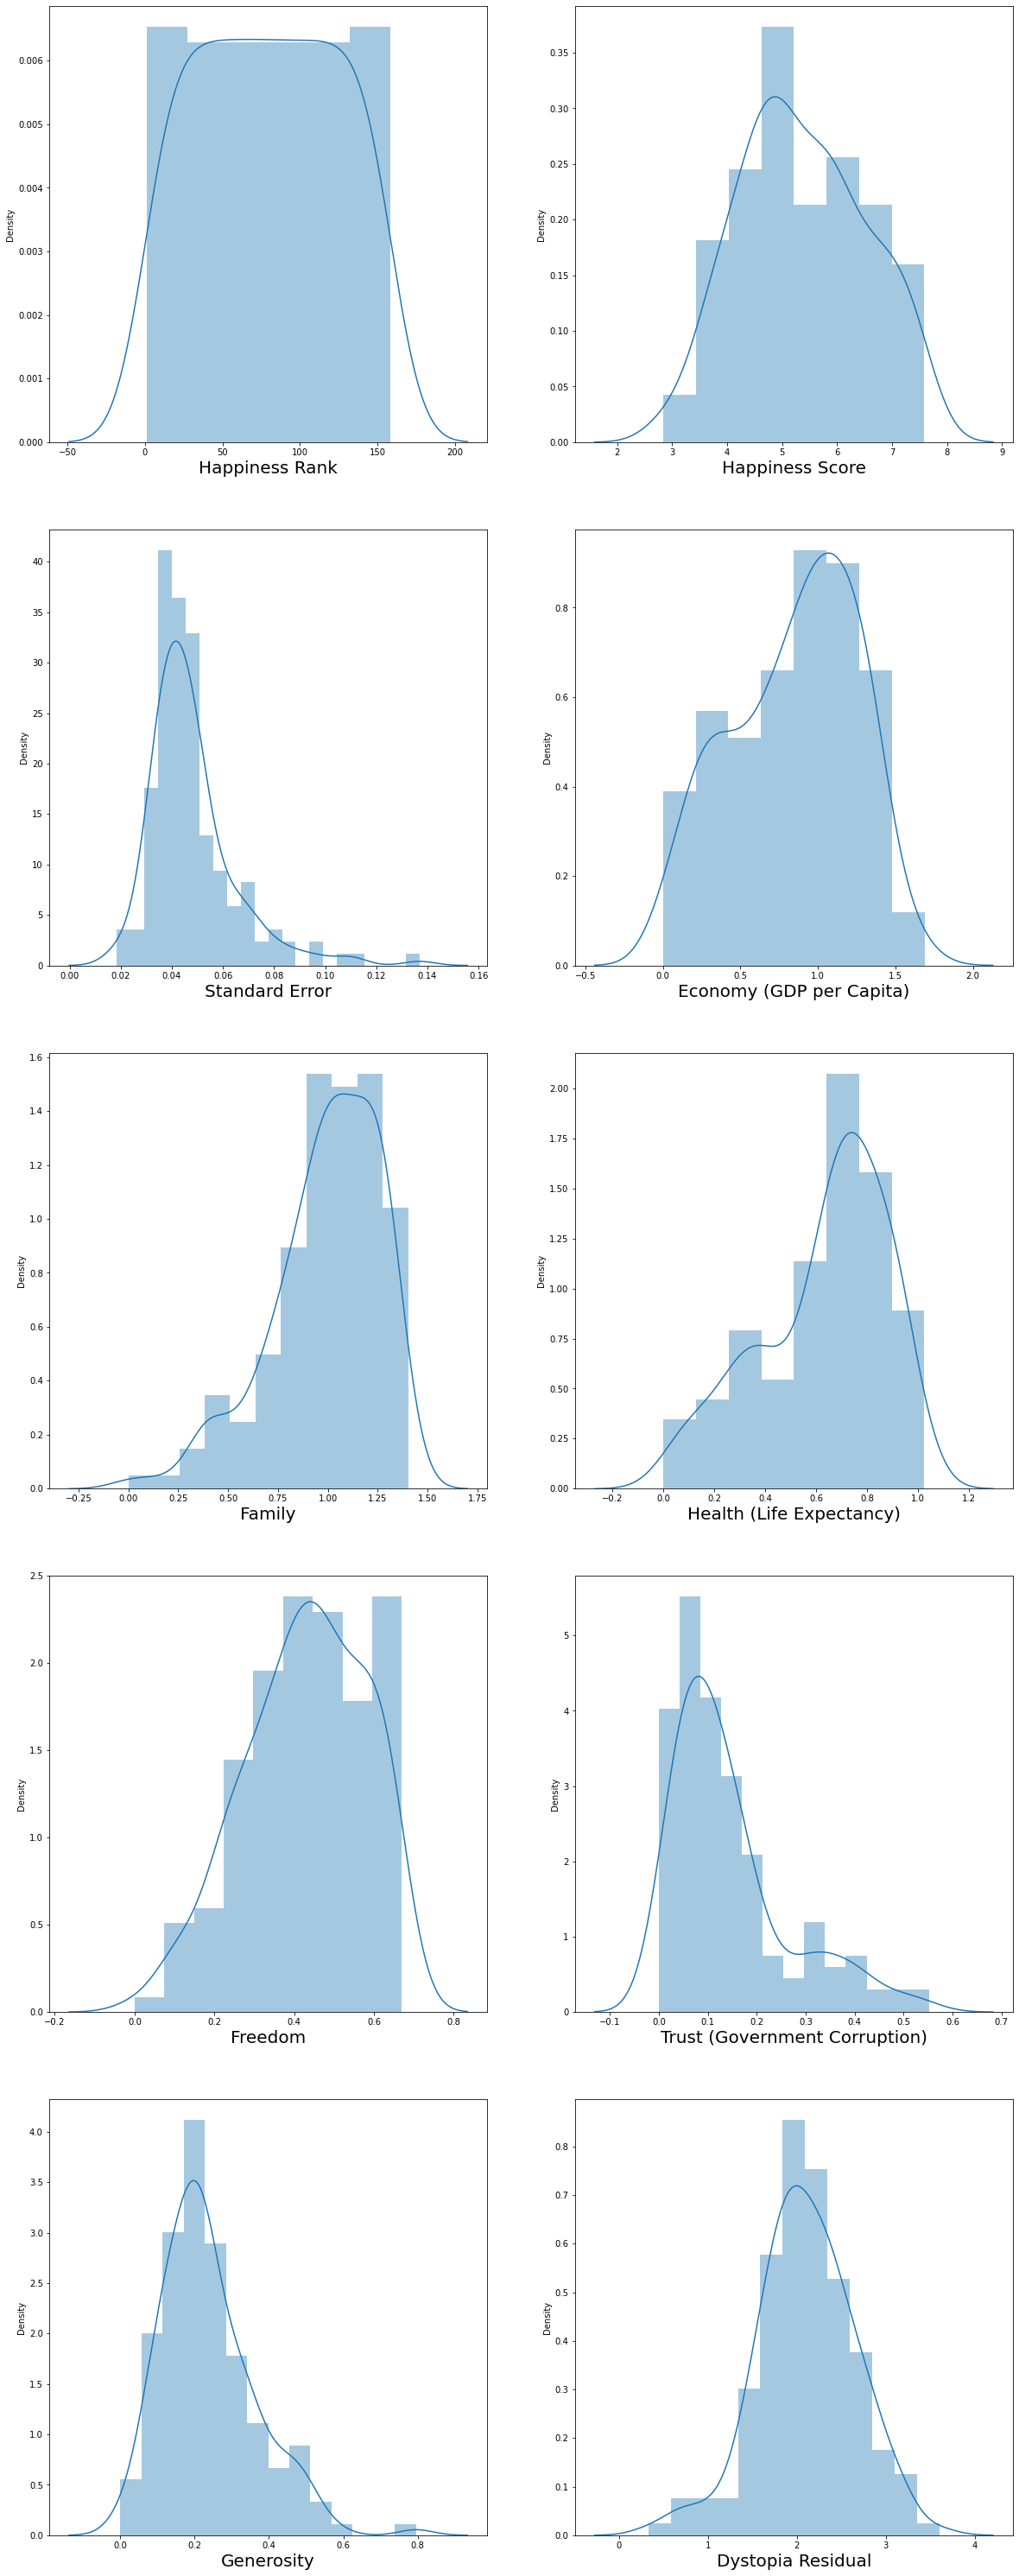

In [21]:
# let's see how data is distributed for every column after power transformer
plt.figure(figsize=(20,65), facecolor='white')
plotno = 1

for column in df.columns:
    if (2<plotno<=13) :
        ax = plt.subplot(6,2,plotno)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotno+=1
plt.show()                         

# Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [27]:
LE=LabelEncoder()
categ = ['Country', 'Region']

df[categ] = df[categ].apply(LE.fit_transform)

In [28]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Identifying outliers

<AxesSubplot:>

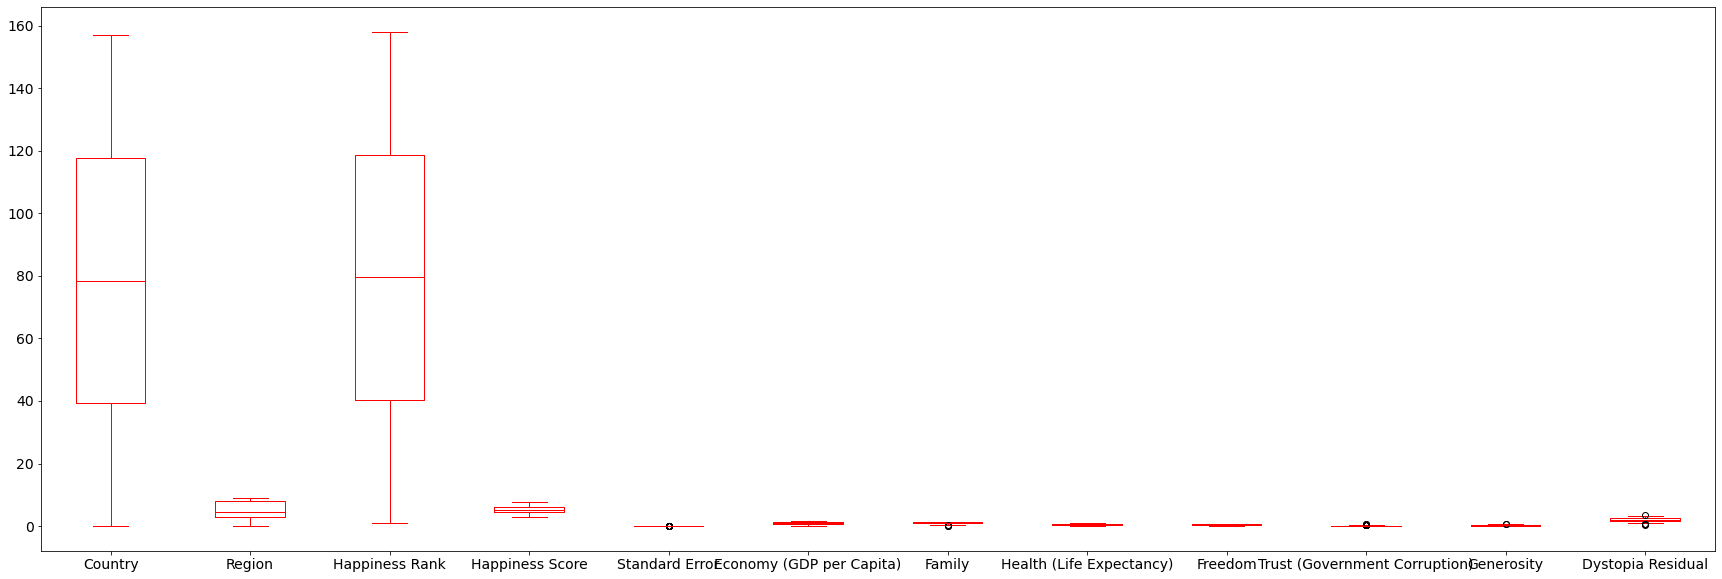

In [36]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

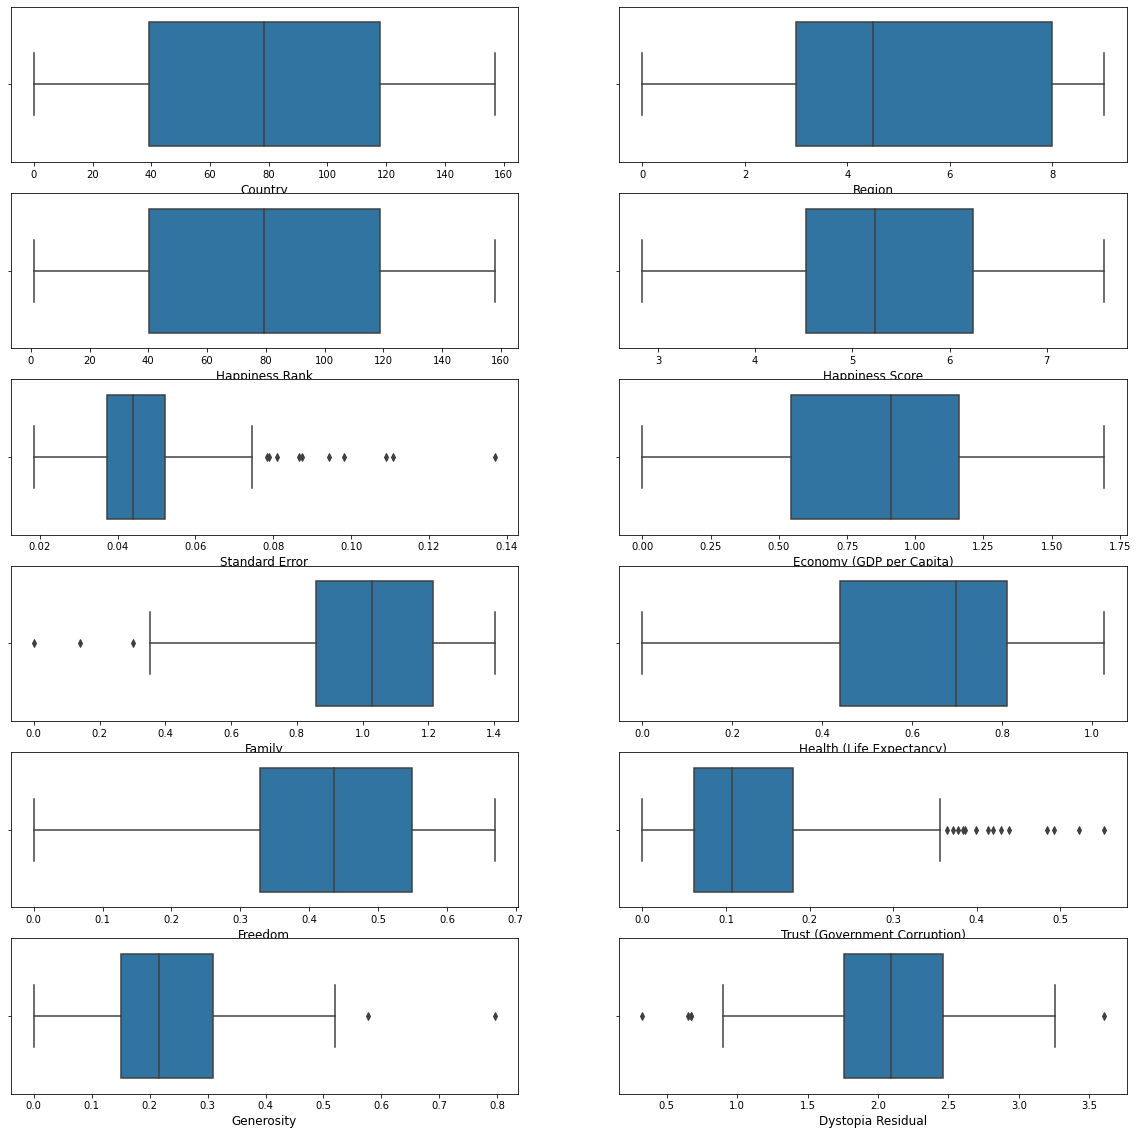

In [41]:
# let's identify outliers for every column
plt.figure(figsize=(20,20), facecolor='white')
plotno = 1

for column in df.columns:
    if (plotno<=13) :
        ax = plt.subplot(6,2,plotno)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
       
    plotno+=1
plt.show() 

we are able to observe outliers in multiple columns

In [49]:
from scipy.stats import zscore
zsco=np.abs(zscore(df))
df_new=df[(zsco<3).all(axis=1)]

In [50]:
df_new.shape

(149, 12)

In [51]:
df.shape

(158, 12)

In [52]:
((9/158)*100)

5.69620253164557

In [63]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [64]:
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


The data loss is less than 10% in zscore method

# using heatmap 

<AxesSubplot:>

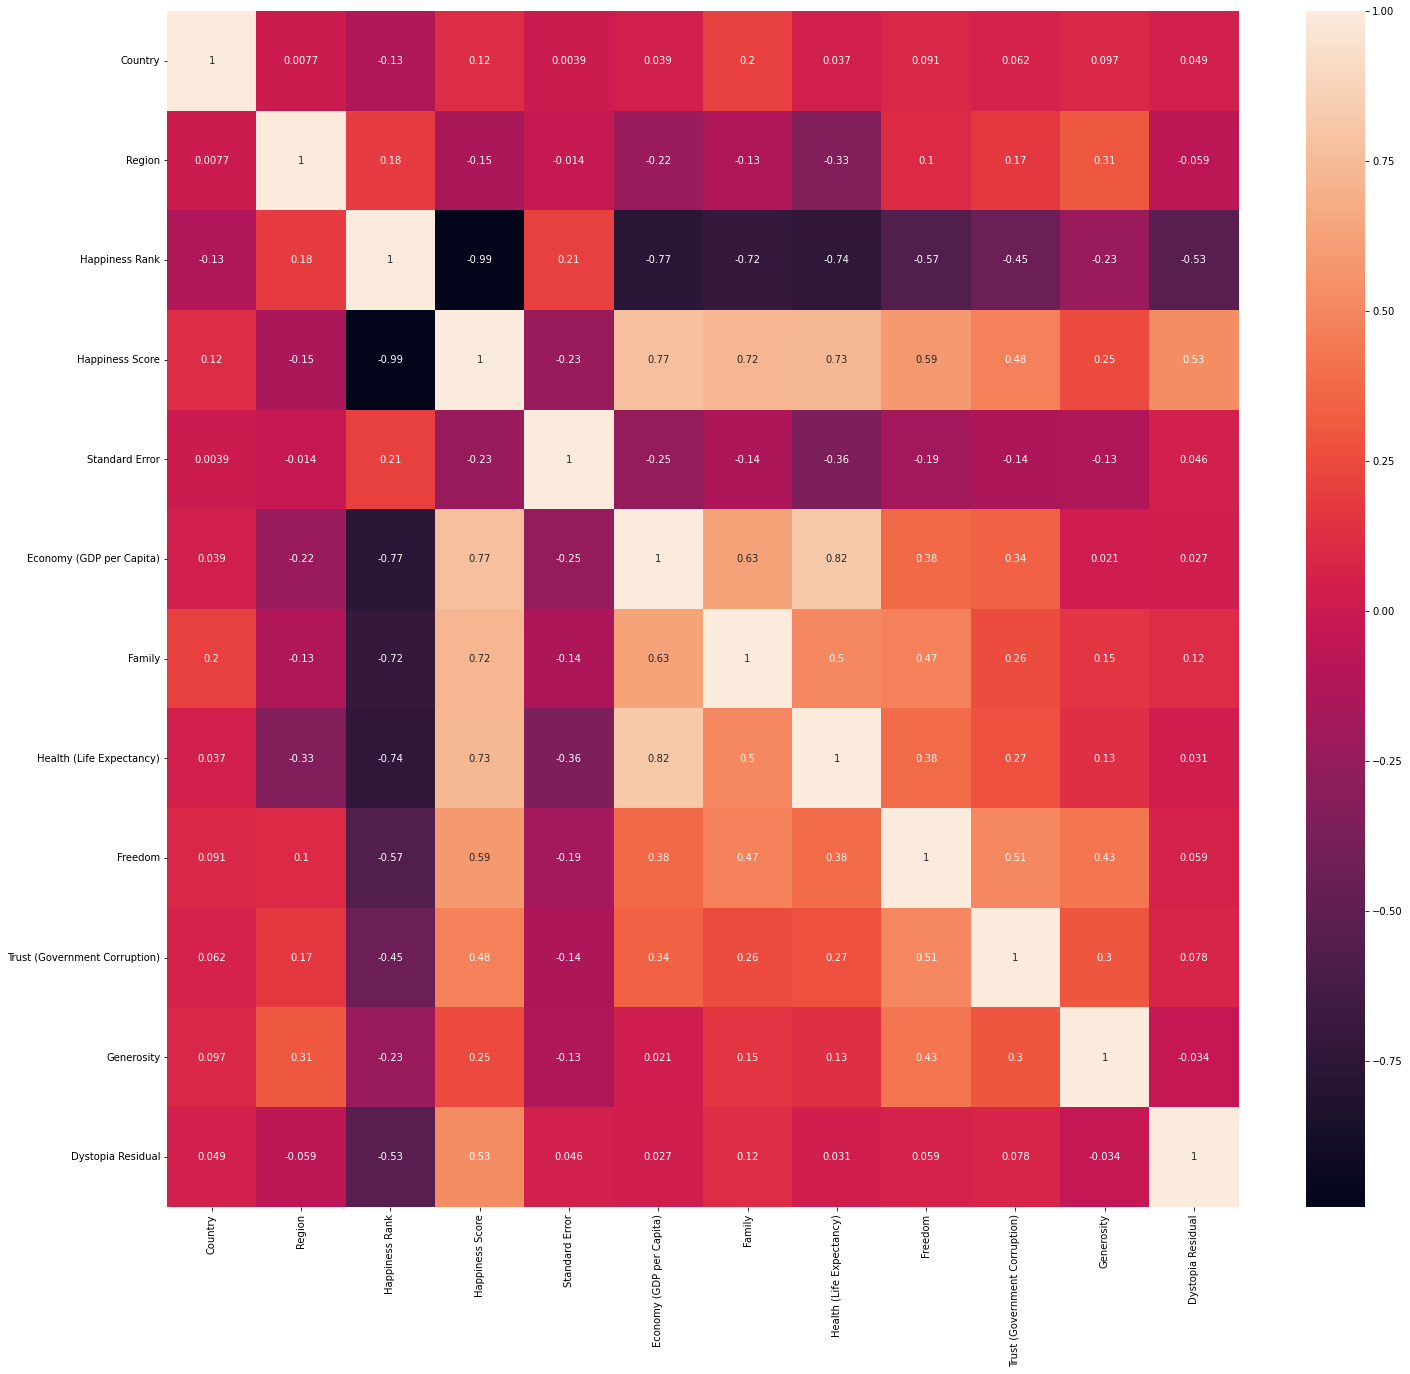

In [53]:
plt.figure(figsize=(24,22))
sns.heatmap(df.corr(),annot=True

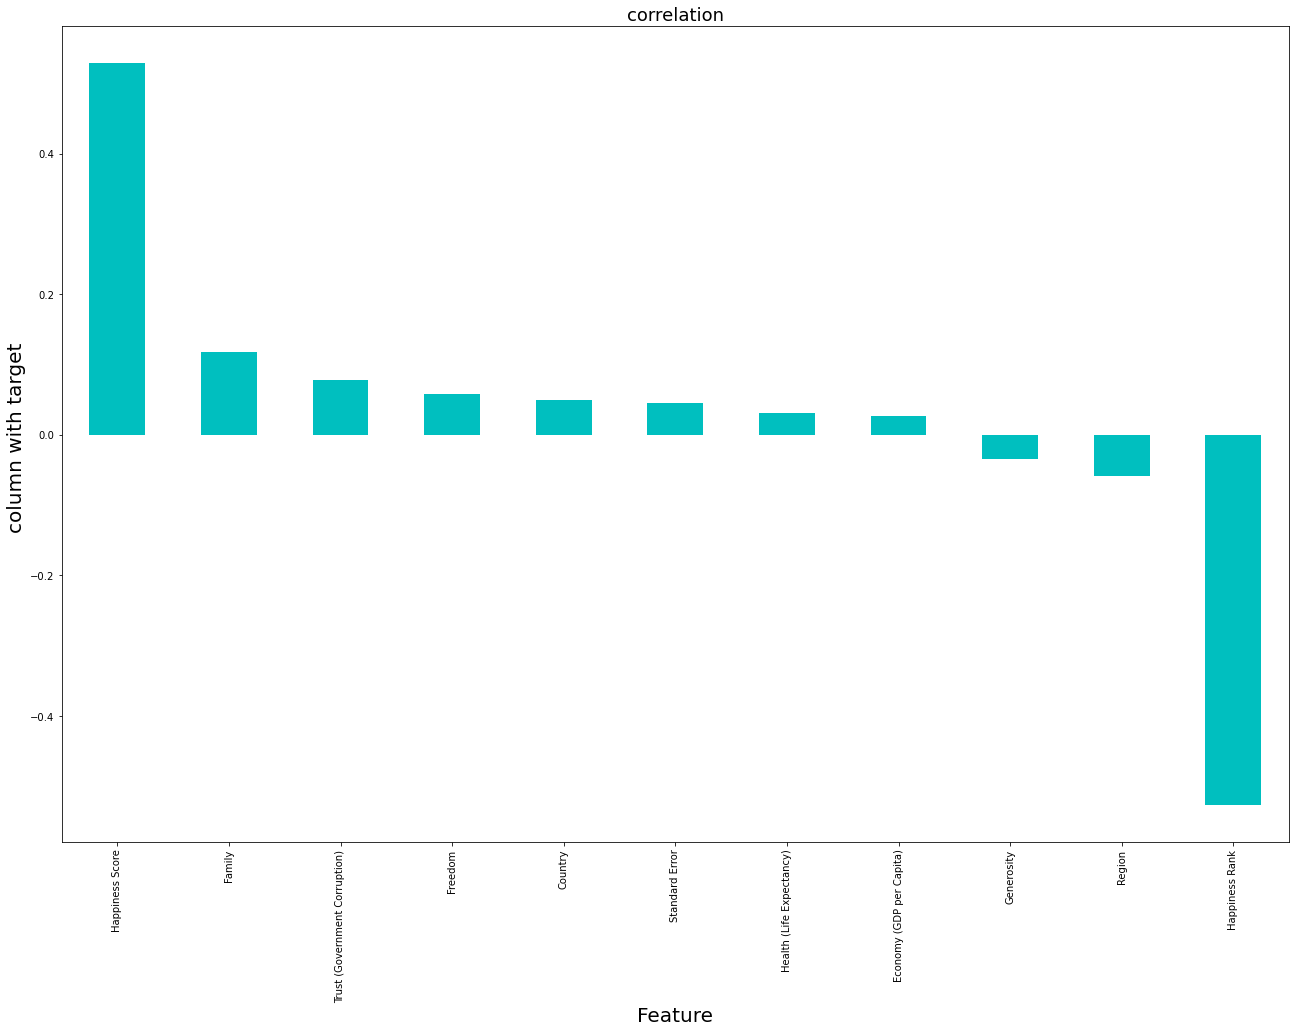

In [55]:
plt.figure(figsize=(22,15))
df_new.corr()['Dystopia Residual'].sort_values(ascending=False).drop(['Dystopia Residual']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('column with target ',fontsize=20)
plt.title('correlation',fontsize=18)
plt.show()

In [59]:
X=df.drop('Dystopia Residual',axis=1)


In [61]:
y=df['Dystopia Residual']


In [62]:
X.skew().sort_values(ascending=False)

Standard Error                   1.983439
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Happiness Score                  0.097769
Happiness Rank                   0.000418
Country                          0.000000
Region                          -0.116119
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [66]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X)        


In [67]:
X = pd.DataFrame(X_new,columns=X.columns)

In [68]:
X.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Generosity                       0.013320
Standard Error                  -0.020092
Happiness Score                 -0.027956
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Region                          -0.228041
Happiness Rank                  -0.264365
Country                         -0.279791
dtype: float64

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [75]:
X_scaled.shape

(158, 11)

In [77]:
X_scaled.shape[1]

11

the skewness has been removed

# lets check for multicollinearity

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["features"]=X.columns

In [80]:
vif

,vif,features
0,1.041379,Country
1,1.367526,Region
2,56.777733,Happiness Rank
3,54.607503,Happiness Score
4,1.172650,Standard Error
5,4.813846,Economy (GDP per Capita)
6,2.787659,Family
7,4.409107,Health (Life Expectancy)
8,2.117970,Freedom
9,1.515871,Trust (Government Corruption)


we can remove the Happiness Rank as it is>5

In [81]:
X=X.drop('Happiness Rank',axis=1)

In [84]:
X.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [85]:
X_scaled=scaler.fit_transform(X)

In [86]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["features"]=X.columns
vif

,vif,features
0,1.041259,Country
1,1.361651,Region
2,4.676400,Happiness Score
3,1.171690,Standard Error
4,4.813532,Economy (GDP per Capita)
5,2.781766,Family
6,4.328448,Health (Life Expectancy)
7,2.102786,Freedom
8,1.456431,Trust (Government Corruption)
9,1.453946,Generosity


since vif score is less than 5 this is allowable let move on with the data

In [203]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [204]:
#Selecting best random state

In [205]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    
    pred_lr_train=LR.predict(x_train)
    pred_lr_test=LR.predict(x_test)
    
    print(f"At random state{i},the training accuracy is :-",r2_score(y_train,pred_lr_train)*100)
    print(f"At random state{i},the testing accuracy is :- ",r2_score(y_test,pred_lr_test)*100)
    print("\n")

At random state0,the training accuracy is :- 95.57621950773162
At random state0,the testing accuracy is :-  96.27023986939707


At random state1,the training accuracy is :- 96.23889289271466
At random state1,the testing accuracy is :-  91.80730281672487


At random state2,the training accuracy is :- 95.10595458172052
At random state2,the testing accuracy is :-  97.77732781869963


At random state3,the training accuracy is :- 95.75748867825882
At random state3,the testing accuracy is :-  95.45875105730462


At random state4,the training accuracy is :- 95.11553237740846
At random state4,the testing accuracy is :-  97.66862679190852


At random state5,the training accuracy is :- 95.7374717796264
At random state5,the testing accuracy is :-  95.36680610288602


At random state6,the training accuracy is :- 95.50661562598405
At random state6,the testing accuracy is :-  97.05510091671755


At random state7,the training accuracy is :- 96.26631643086864
At random state7,the testing accuracy is :

we will choose random state 11 with least difference in training and testing accuracy

In [206]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.02, random_state =11)

In [207]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# 1)LinearRegression

In [190]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print("accuracy of the model =",(r2_score(y_test, pred_lr))*100)

accuracy of the model = 96.29804898287668


In [278]:
cv_score=(cross_val_score(lr,X,y,cv=5).mean())*100
cv_score

85.92145825803334

In [279]:
#importing necessary library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# 2) Lasso regression

In [280]:
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [293]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score= ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score*100


96.05068423919884

In [294]:
print("accuracy of the model =",(r2_score(y_test, pred_ls))*100)
ls_score*100

accuracy of the model = -6.544517876041889


96.05068423919884

In [295]:
cv_score=(cross_val_score(ls,X,y,cv=5).mean())*100
cv_score

85.94068827272068

# 3)Ensemble technique

In [296]:
parameters={'criterion':['mse','mae','rms'],
           'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [297]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rfs1=rf.score(x_train,y_train)
print(rfs1*100)
pred_test_rf=rf.predict(x_test)

rfs=r2_score(y_test, pred_test_rf)
print("R2 score :",rfs*100)


cv_score=(cross_val_score(ls,X,y,cv=5).mean())*100
print("cross val score",cv_score)

94.3417675069705
R2 score : -24.015673488867996
cross val score 85.94068827272068


# 4) KNN regressor

In [154]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()


In [268]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn =KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [288]:

knn=KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test_knn=knn.predict(x_test)

rfs=r2_score(y_test, pred_test_knn)
print("R2 score :",rfs*100)

cvscore=(cross_val_score(knn,X,y,cv=5))

print("cross val score",cvscore.mean()*100)

R2 score : 76.1192899676172
cross val score -76.74168053173635


# 1)DecisionTreeRegressor

In [219]:
parameter={'max_depth':np.arange(2,50),
          'max_features':["auto","sqrt","log2"]}

dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 10, 'max_features': 'auto'}


In [298]:
dt=DecisionTreeRegressor(max_depth=4,max_features='auto')

dt.fit(x_train,y_train)
dts1=dt.score(x_train,y_train)
print("training accuracy =",dts1*100)

pred_test_dt=dt.predict(x_test)

dts=r2_score(y_test, pred_test_dt)
print("R2 score :",dts*100)


dtscore=(cross_val_score(dt,X,y,cv=5).mean())*100
print("cross val score",dtscore)

training accuracy = 73.70152367180134
R2 score : -98.2454773454936
cross val score -76.41362653502684
